# Домашнее задание к лекции
# «Логистическая регрессия и дискриминантный анализ»

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap = cmap)

In [4]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['class'] = iris.target

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data.drop(['petal length (cm)', 'petal width (cm)', 'class'], axis=1, inplace=True)
data['variety'] = load_iris().target
data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [7]:
data_train, data_test = train_test_split(data, test_size=0.2)

In [8]:
data_train

,sepal length (cm),sepal width (cm),variety
38,4.4,3.0,0
56,6.3,3.3,1
14,5.8,4.0,0
2,4.7,3.2,0
118,7.7,2.6,2
...,...,...,...
8,4.4,2.9,0
139,6.9,3.1,2
13,4.3,3.0,0
143,6.8,3.2,2


In [9]:
data_test

,sepal length (cm),sepal width (cm),variety
79,5.7,2.6,1
102,7.1,3.0,2
5,5.4,3.9,0
32,5.2,4.1,0
144,6.7,3.3,2
65,6.7,3.1,1
129,7.2,3.0,2
148,6.2,3.4,2
127,6.1,3.0,2
26,5.0,3.4,0


In [10]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [13]:
data_train

,sepal length (cm),sepal width (cm)
38,4.4,3.0
56,6.3,3.3
14,5.8,4.0
2,4.7,3.2
118,7.7,2.6
...,...,...
8,4.4,2.9
139,6.9,3.1
13,4.3,3.0
143,6.8,3.2


In [14]:
lda = LinearDiscriminantAnalysis()

In [15]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [16]:
lda.predict(data_test)

array([1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0,
       2, 0, 2, 2, 1, 1, 0, 0])

In [19]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,1,1
1,2,2
2,0,0
3,0,0
4,2,2
5,1,2
6,2,2
7,2,1
8,2,1
9,0,0


In [22]:
accuracy_score(y_test, lda.predict(data_test))

0.8

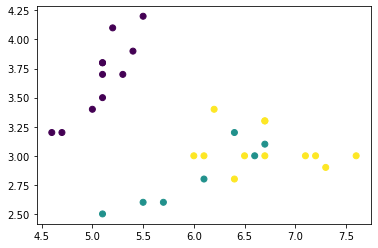

In [29]:
plt.scatter(data_test['sepal length (cm)'], data_test['sepal width (cm)'], c = y_test)
plt.show()

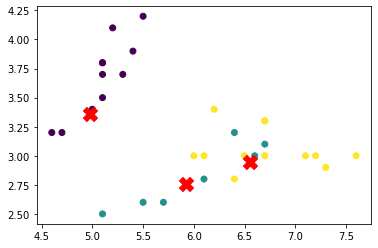

In [30]:
plt.scatter(data_test['sepal length (cm)'], data_test['sepal width (cm)'], c = y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=200, marker='X')
plt.show()

In [33]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

/home/yuriy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


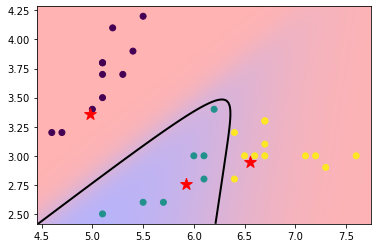

In [35]:
plt.scatter(data_test['sepal length (cm)'], data_test['sepal width (cm)'], c = lda.predict(data_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes',
                   norm = colors.Normalize(0., 1.), zorder = -1)
plt.contour(xx, yy, Z, [0.5], linewidths = 2., colors = 'black')

In [37]:
data = data[['sepal length (cm)','sepal width (cm)']]
data.columns = ['sepal_length','sepal_width']
data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [42]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

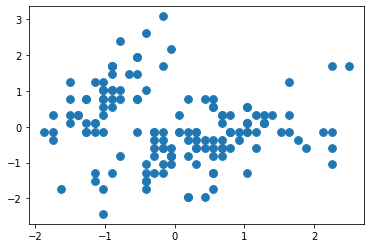

In [43]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap = 'autumn', s = 60)

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(data_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

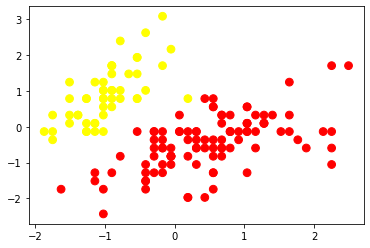

In [47]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap = 'autumn', c = clusters, s = 60)

In [48]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

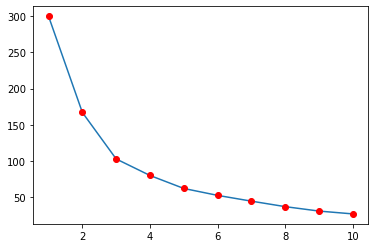

In [49]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [53]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

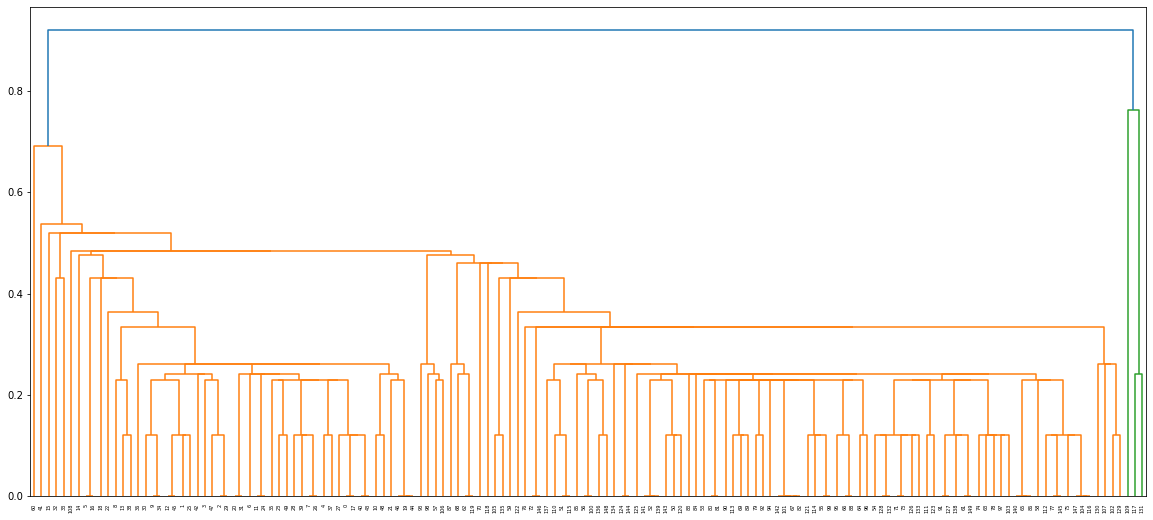

In [54]:
distance_mat = pdist(data_scaled)
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z, color_threshold=0.8)

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(data_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

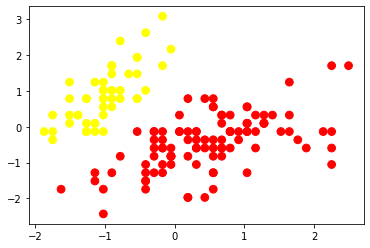

In [52]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', c=clusters, s=60)